In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def gradient_for_b(x, y, m, b):
    diff = sum([y_i - (m * x_i + b) for x_i, y_i in zip(x, y)])
    b_gradient = diff * (-2 / len(x))
    
    return b_gradient

In [4]:
def gradient_for_m(x, y, m, b):
    diff = sum([x_i * (y_i - (m * x_i + b)) for x_i, y_i in zip(x, y)])
    m_gradient = diff * (-2 / len(x))
    
    return m_gradient

In [5]:
def step_gradient(x, y, m_current, b_current, learning_rate):
    b_gradient = gradient_for_b(x, y, m_current, b_current)
    m_gradient = gradient_for_m(x, y, m_current, b_current)
    b = b_current - (learning_rate * b_gradient)
    m = m_current - (learning_rate * m_gradient)
    
    return [b, m]

In [6]:
def gradient_descent(x, y, learning_rate, num_iteration): #interation(반복)
    m, b = 0, 0
    #m, b를 '0'으로 초기화
    for i in range(num_iteration):
        b, m = step_gradient(x, y, b, m, learning_rate)
        x = np.array(x) 
        y = np.array(y) 
        #numpy로 만들어줘야 m * x행렬연산가능
        y_predicted = m * x + b
        cost = (1 / len(x)) * sum([val ** 2 for val in (y - y_predicted)])
        if i % 100 == 0:
            print("b = {}, m = {}, cost = {}".format(b, m, cost))
    
    return [b, m]
    

In [7]:
df = pd.read_csv('monthly_revenue.csv')
df

,months,revenue
0,1,52
1,2,74
2,3,79
3,4,95
4,5,115
5,6,110
6,7,129
7,8,126
8,9,147
9,10,146


Text(0, 0.5, 'revenue')

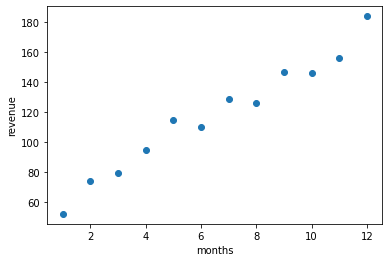

In [8]:
# 월별 수익 그래프를 산점도로 나타낸다
plt.scatter(df.months, df.revenue)
plt.xlabel('months')
plt.ylabel('revenue')

b = 2.355, m = 17.78333333333333, cost = 701.1453212962957
b = 14.786772824300119, m = 14.646993154550138, cost = 325.7208337147323
b = 14.786772824300119, m = 14.646993154550138, cost = 325.7208337147323
b = 14.786772824300119, m = 14.646993154550138, cost = 325.7208337147323
b = 14.786772824300119, m = 14.646993154550138, cost = 325.7208337147323
b = 14.786772824300119, m = 14.646993154550138, cost = 325.7208337147323
b = 14.786772824300119, m = 14.646993154550138, cost = 325.7208337147323
b = 14.786772824300119, m = 14.646993154550138, cost = 325.7208337147323
b = 14.786772824300119, m = 14.646993154550138, cost = 325.7208337147323
b = 14.786772824300119, m = 14.646993154550138, cost = 325.7208337147323


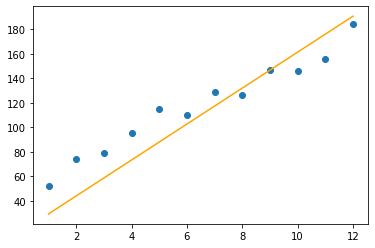

In [9]:
b, m = gradient_descent(df.months, df.revenue, 0.01, 1000)
y = [m*x + b for x in df.months]

plt.scatter(df.months, df.revenue)
plt.plot(df.months, y, color='orange')

In [11]:
#zip함수 : 배열을 묶어준다.
x = [1, 2, 3]
y = [2, 3, 4]

a = [a*b for a, b in zip(x, y)]
a

[2, 6, 12]